<a href="https://colab.research.google.com/github/yeesem/Python/blob/main/Web_Scraping_KLSE_SCREENER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

In [2]:
requests.utils.default_headers()

{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

# **KLSE Screener**

In [3]:
headers = {
    "User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/117.0"
}

symbol = "1155"
url = "https://www.klsescreener.com/v2/stocks/view/" + symbol
page = requests.get(url, headers=headers)
html = page.content
soup = BeautifulSoup(html)

In [4]:
page

<Response [200]>

In [5]:
print(soup)

<!-- <!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd"> --><!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no, viewport-fit=cover" name="viewport"/>
<title>
        MAYBANK: MALAYAN BANKING BERHAD (1155) | KLSE Screener
    </title>
<link href="/v2/img/favicon_v2.ico" rel="icon" type="image/x-icon"/><link href="/v2/img/favicon_v2.ico" rel="shortcut icon" type="image/x-icon"/><link href="//cdn.klsescreener.com/v2/css/chosen.min.css" rel="stylesheet" type="text/css"/> <link href="/v2/img/apple-touch-icon.png" rel="apple-touch-icon"/>
<script>
        var $base_url = '/v2/';
    </script>
<meta content="bursascreener, bursa screener, bursa malaysia, bursa, klse, kuala lumpur stock exchange, st

In [6]:
soup.find_all('table')

[<table class="stock_details table table-hover table-striped table-theme">
 <tr>
 <td>High</td>
 <td class="number" id="priceHigh">9.560</td>
 </tr>
 <tr>
 <td>Low</td>
 <td class="number" id="priceLow">9.420</td>
 </tr>
 <tr>
 <td>Open</td>
 <td class="number" id="priceHigh">9.450</td>
 </tr>
 <tr>
 <td>Volume</td>
 <td class="number text_volume" id="volume">6,192,600</td>
 </tr>
 <tr>
 <td>Volume (B/S)</td>
 <td class="number" id="volumeBuySell"><span class="text_volume" id="volume-bid">158,000</span> / <span class="text_volume" id="volume-ask">71,200</span></td>
 </tr>
 <tr>
 <td>Price Bid/Ask</td>
 <td class="number" id="priceBidAsk"><span id="price-bid">9.500</span> / <span id="price-ask">9.520</span></td>
 </tr>
 <tr>
 <td> </td>
 <td> </td>
 </tr>
 <tr>
 <td>52w</td>
 <td class="number">8.260 - 9.600</td>
 </tr>
 <tr>
 <td title="Return on Equity" width="120">ROE</td>
 <td class="number">9.87</td>
 </tr>
 <tr>
 <td title="Price to Earning Ratio">P/E</td>
 <td class="number">12.2

In [7]:
print(len(soup.find_all('table')))

print("\n\n\n")

soup.find_all('table')[5]

10






<table class="table table-hover table-theme">
<tr>
<th>Financial Year</th>
<th class="number">Revenue ('000)</th>
<th class="number">Net ('000)</th>
<th class="number">EPS</th>
<th class="number">DP%</th>
<th class="number">Net %</th>
<th class="number">Report</th>
</tr>
<tr class="">
<td>31 Dec, 2023</td>
<td class="number">64,060,169</td>
<td class="number">9,349,780</td>
<td class="number">77.55</td>
<th class="number">0.77</th>
<th class="number">
</th>
<td class="number">
</td>
</tr>
<tr class="table-alternate">
<td>31 Dec, 2022</td>
<td class="number">51,041,391</td>
<td class="number">8,234,949</td>
<td class="number">68.94</td>
<th class="number">0.84</th>
<th class="number">
<span class="btn-sm btn-success">
                                                        1.7%
                                                        </span>
</th>
<td class="number">
<a href="/v2/announcements/view/4611213" target="_blank">View</a>
</td>
</tr>
<tr class="">
<td>31 Dec, 2021</td>
<td clas

In [8]:
table = soup.find('table',class_ = 'table table-hover table-theme')

table

<table class="table table-hover table-theme">
<tr>
<th>Financial Year</th>
<th class="number">Revenue ('000)</th>
<th class="number">Net ('000)</th>
<th class="number">EPS</th>
<th class="number">DP%</th>
<th class="number">Net %</th>
<th class="number">Report</th>
</tr>
<tr class="">
<td>31 Dec, 2023</td>
<td class="number">64,060,169</td>
<td class="number">9,349,780</td>
<td class="number">77.55</td>
<th class="number">0.77</th>
<th class="number">
</th>
<td class="number">
</td>
</tr>
<tr class="table-alternate">
<td>31 Dec, 2022</td>
<td class="number">51,041,391</td>
<td class="number">8,234,949</td>
<td class="number">68.94</td>
<th class="number">0.84</th>
<th class="number">
<span class="btn-sm btn-success">
                                                        1.7%
                                                        </span>
</th>
<td class="number">
<a href="/v2/announcements/view/4611213" target="_blank">View</a>
</td>
</tr>
<tr class="">
<td>31 Dec, 2021</td>
<td clas

In [9]:
incompleted_titles = soup.find_all('th')[0:10]
print(incompleted_titles)

[<th class="number"><span>EPS<span></span></span></th>, <th class="number"><span>DPS</span></th>, <th class="number"><span>NTA</span></th>, <th class="number"><span>Revenue</span></th>, <th class="number"><span>P/L</span></th>, <th class="text-center"><span>Quarter</span></th>, <th><span>Q Date</span></th>, <th><span>Financial Year</span></th>, <th><span>Announced</span></th>, <th class="number"><span>ROE</span></th>]


In [10]:
titles = [title.text for title in incompleted_titles]
print(titles)

['EPS', 'DPS', 'NTA', 'Revenue', 'P/L', 'Quarter', 'Q Date', 'Financial Year', 'Announced', 'ROE']


In [11]:
incompleted_title = table.find_all('th')

print(incompleted_title)

[<th>Financial Year</th>, <th class="number">Revenue ('000)</th>, <th class="number">Net ('000)</th>, <th class="number">EPS</th>, <th class="number">DP%</th>, <th class="number">Net %</th>, <th class="number">Report</th>, <th class="number">0.77</th>, <th class="number">
</th>, <th class="number">0.84</th>, <th class="number">
<span class="btn-sm btn-success">
                                                        1.7%
                                                        </span>
</th>, <th class="number">0.83</th>, <th class="number">
<span class="btn-sm btn-success">
                                                        24.9%
                                                        </span>
</th>, <th class="number">0.9</th>, <th class="number">
<span class="btn-sm btn-danger">
                                                        20.9%
                                                        </span>
</th>, <th class="number">0.87</th>, <th class="number">
<span class="btn-sm bt

In [12]:
titles = [title.text.strip() for title in incompleted_title]

print(titles)

['Financial Year', "Revenue ('000)", "Net ('000)", 'EPS', 'DP%', 'Net %', 'Report', '0.77', '', '0.84', '1.7%', '0.83', '24.9%', '0.9', '20.9%', '0.87', '1.0%', '0.77', '7.9%', '0.76', '11.5%', '0.77', '1.4%', '0.75', '1.8%', '0.77', '2.5%', '0.71', '14.1%', '0.89', '122.4%', '1.05', '42.0%', '0.98', '16.6%', '1.02', '451.9%', '0', '76.4%', '0.78', '8.4%', '0.96', '14.0%', '1.14', '12.0%', '1.5', '3.2%', '0.89', '21.4%', '0.62', '']


In [139]:
df = pd.DataFrame(columns = titles[:4])

df

,Financial Year,Revenue ('000),Net ('000),EPS


In [14]:
table.find_all('tr')

[<tr>
 <th>Financial Year</th>
 <th class="number">Revenue ('000)</th>
 <th class="number">Net ('000)</th>
 <th class="number">EPS</th>
 <th class="number">DP%</th>
 <th class="number">Net %</th>
 <th class="number">Report</th>
 </tr>,
 <tr class="">
 <td>31 Dec, 2023</td>
 <td class="number">64,060,169</td>
 <td class="number">9,349,780</td>
 <td class="number">77.55</td>
 <th class="number">0.77</th>
 <th class="number">
 </th>
 <td class="number">
 </td>
 </tr>,
 <tr class="table-alternate">
 <td>31 Dec, 2022</td>
 <td class="number">51,041,391</td>
 <td class="number">8,234,949</td>
 <td class="number">68.94</td>
 <th class="number">0.84</th>
 <th class="number">
 <span class="btn-sm btn-success">
                                                         1.7%
                                                         </span>
 </th>
 <td class="number">
 <a href="/v2/announcements/view/4611213" target="_blank">View</a>
 </td>
 </tr>,
 <tr class="">
 <td>31 Dec, 2021</td>
 <td class="nu

In [15]:
column_data = table.find_all('tr')

In [141]:
annual_data = []
for row in column_data[1:]:
  row_data = row.find_all('td')
  individual_row_data = [data.text.strip() for data in row_data]
  annual_data.append(individual_row_data)
  length = len(df)
  df.loc[length] = individual_row_data[:4]

print(annual_data)

print("\n")

df = df.sort_values(by = 'Financial Year',ascending = True)
df.columns = ['Financial Year','Revenue','Net Profit','EPS']
df2 = df.T
df2

[['31 Dec, 2023', '64,060,169', '9,349,780', '77.55', ''], ['31 Dec, 2022', '51,041,391', '8,234,949', '68.94', 'View'], ['31 Dec, 2021', '45,959,390', '8,096,229', '69.74', 'View'], ['31 Dec, 2020', '51,013,933', '6,481,219', '57.66', 'View'], ['31 Dec, 2019', '52,844,964', '8,198,074', '73.40', 'View'], ['31 Dec, 2018', '47,319,853', '8,113,260', '74.16', 'View'], ['31 Dec, 2017', '45,580,310', '7,520,542', '72.58', 'View'], ['31 Dec, 2016', '44,657,902', '6,742,992', '67.59', 'View'], ['31 Dec, 2015', '40,556,371', '6,835,939', '72.04', 'View'], ['31 Dec, 2014', '35,712,006', '6,716,455', '73.93', 'View'], ['31 Dec, 2013', '33,570,670', '6,552,391', '75.73', 'View'], ['31 Dec, 2012', '27,532,460', '5,744,696', '72.67', 'View'], ['31 Dec, 2011', '12,884,511', '2,583,069', '34.42', 'View'], ['30 Jun, 2011', '21,039,643', '4,450,278', '61.39', 'View'], ['30 Jun, 2010', '16,004,278', '3,818,167', '53.95', 'View'], ['30 Jun, 2009', '17,586,337', '691,875', '19.46', 'View'], ['30 Jun, 200

,21,43,42,20,19,41,18,40,39,17,...,26,4,3,25,24,2,1,23,22,0
Financial Year,"30 Jun, 2003","30 Jun, 2003","30 Jun, 2004","30 Jun, 2004","30 Jun, 2005","30 Jun, 2005","30 Jun, 2006","30 Jun, 2006","30 Jun, 2007","30 Jun, 2007",...,"31 Dec, 2019","31 Dec, 2019","31 Dec, 2020","31 Dec, 2020","31 Dec, 2021","31 Dec, 2021","31 Dec, 2022","31 Dec, 2022","31 Dec, 2023","31 Dec, 2023"
Revenue,"9,981,902","9,981,902","10,520,920","10,520,920","11,216,087","11,216,087","12,701,748","12,701,748","14,793,369","14,793,369",...,"52,844,964","52,844,964","51,013,933","51,013,933","45,959,390","45,959,390","51,041,391","51,041,391","64,060,169","64,060,169"
Net Profit,"1,996,490","1,996,490","2,424,509","2,424,509","2,502,526","2,502,526","2,803,598","2,803,598","3,196,348","3,196,348",...,"8,198,074","8,198,074","6,481,219","6,481,219","8,096,229","8,096,229","8,234,949","8,234,949","9,349,780","9,349,780"
EPS,56.01,56.01,67.38,67.38,68.48,68.48,74.43,74.43,82.92,82.92,...,73.40,73.40,57.66,57.66,69.74,69.74,68.94,68.94,77.55,77.55


In [142]:
df.set_index('Financial Year',inplace = True)

In [143]:
print(df.head())

                   Revenue Net Profit    EPS
Financial Year                              
30 Jun, 2003     9,981,902  1,996,490  56.01
30 Jun, 2003     9,981,902  1,996,490  56.01
30 Jun, 2004    10,520,920  2,424,509  67.38
30 Jun, 2004    10,520,920  2,424,509  67.38
30 Jun, 2005    11,216,087  2,502,526  68.48


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 30 Jun, 2003 to 31 Dec, 2023
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Revenue     44 non-null     object
 1   Net Profit  44 non-null     object
 2   EPS         44 non-null     object
dtypes: object(3)
memory usage: 1.4+ KB


In [145]:
columns = df.columns
for i in range(len(df.columns)):
  if df[columns[i]].str.contains(',').any():
     df[df.columns[i]] = df[df.columns[i]].str.replace(",","").astype(int)
  elif df[columns[i]].str.contains("\.").any():
     df[columns[i]] = df[columns[i]].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 30 Jun, 2003 to 31 Dec, 2023
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Revenue     44 non-null     int64  
 1   Net Profit  44 non-null     int64  
 2   EPS         44 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.4+ KB


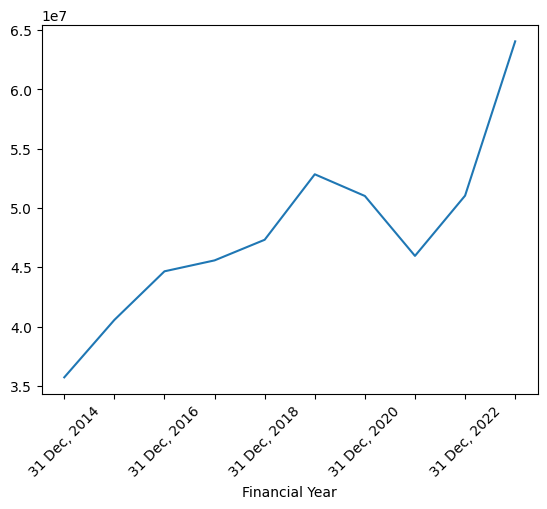

In [115]:
ax = df[columns[0]][-10:].plot()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xticks(range(len(df[columns[0]][-10:])))
plt.show()

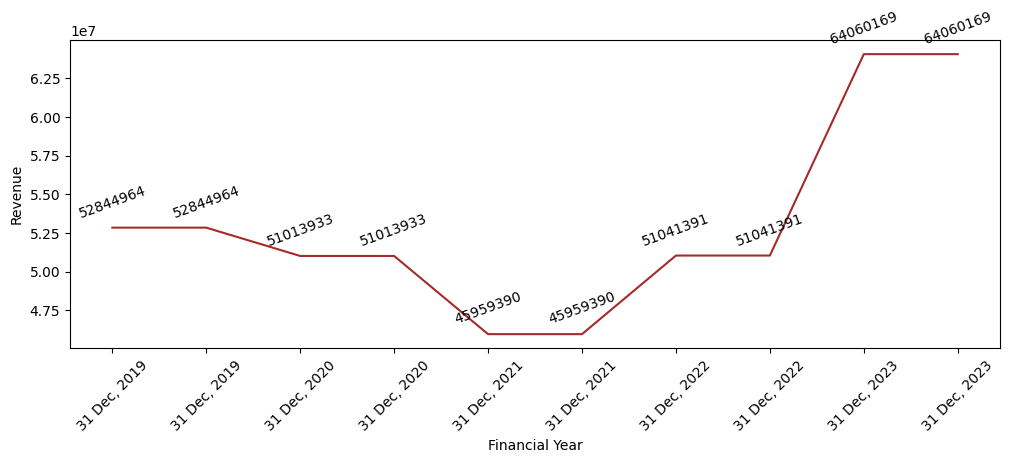

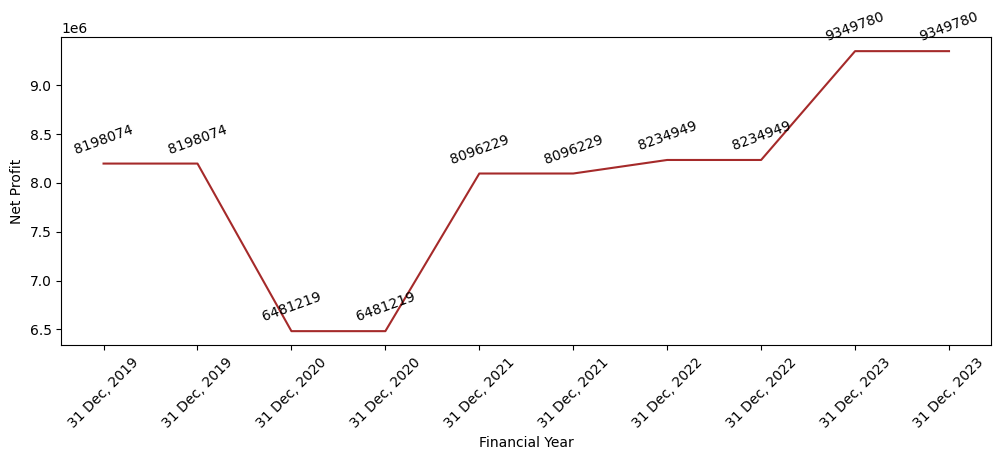

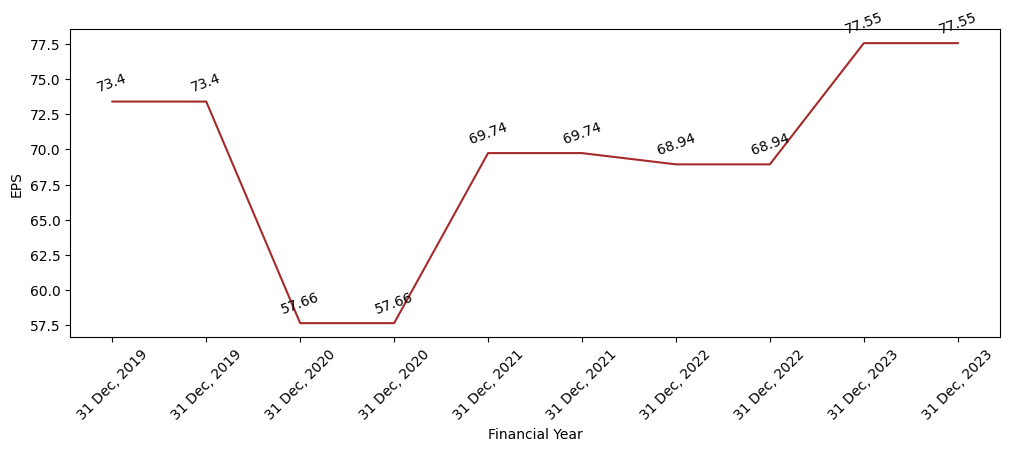

In [151]:
for col in columns:
   ax = df[col][-10:].plot(color = 'brown',figsize = (12,4))
   plt.xticks(rotation = 45)
   plt.ylabel(col)
   ax.set_xticks(range(len(df[col][-10:])))
   ax.set_xticklabels(df.index[-10:])
   # Annotate each point with its corresponding y-value
   for x, y in zip(range(len(df[col][-10:])), df[col][-10:]):
       plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,5), ha='center',va = 'bottom',rotation = 20)

   plt.show()

# **I3 Investor**

In [18]:
headers = {
    "User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/117.0"
}

priceTargetUrl = 'https://klse.i3investor.com/web/stock/financial-quarter/' + symbol
page = requests.get(priceTargetUrl,headers = headers)
html = page.content
soup = BeautifulSoup(html)

In [19]:
print(soup)

<!DOCTYPE html>
<html data-theme="light" lang="en"> <head> <meta charset="utf-8"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/> <meta content="MAYBANK (1155): Quarterly Results for Last 10 Financial Years" name="description"/> <meta content="MAYBANK (1155): Quarterly Results for Last 10 Financial Years" name="keywords"/> <meta content="website" property="og:type"/> <meta content="MAYBANK (1155): Quarterly Results for Last 10 Financial Years" property="og:title"/> <meta content="MAYBANK (1155): Quarterly Results for Last 10 Financial Years" property="og:description"/> <meta content="https://klse.i3investor.com/webpub/stock/company/icon_180px/647/1155_maybank_logo_180.png" property="og:image"/> <meta content="ca-pub-9756443410775969" name="google-adsense-account"/> <link href="https://cdn2.i3investor.com/web/img/icon/i3investor16.png" rel="icon" sizes="16x16" type="image/png"/> <link href="h

In [20]:
page

<Response [200]>

In [21]:
html

b'            <!DOCTYPE html> <html lang="en" data-theme="light"> <head> <meta charset="utf-8"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">  <meta name="description" content="MAYBANK (1155): Quarterly Results for Last 10 Financial Years" /> <meta name="keywords" content="MAYBANK (1155): Quarterly Results for Last 10 Financial Years" /> <meta property="og:type" content="website" /> <meta property="og:title" content="MAYBANK (1155): Quarterly Results for Last 10 Financial Years" /> <meta property="og:description" content="MAYBANK (1155): Quarterly Results for Last 10 Financial Years" />  <meta property="og:image" content="https://klse.i3investor.com/webpub/stock/company/icon_180px/647/1155_maybank_logo_180.png" />  <meta name="google-adsense-account" content="ca-pub-9756443410775969">  <link rel="icon" type="image/png" href="https://cdn2.i3investor.com/web/img/icon/i3investor16.png" sizes="16

In [22]:
soup.find_all("table")

[<table class="table table-sm small compact table-responsive" id="dttable-fin-quarter" style="width:100%;background-color:white"> <thead class="mt-2"> <tr> <th class="border text-center" colspan="4">Date</th> <th class="border text-center" colspan="6">Financial Result</th> <th class="border text-center" colspan="3">Financial Ratio</th> <th class="border text-center" colspan="9">Per Share Item</th> <th class="border text-center" colspan="2">Performance</th> <th class="border text-center" colspan="7">Valuation (End of Quarter)</th> <th class="border text-center" colspan="7">Valuation (Ann. Date)</th> </tr> <tr> <th class="border">F.Y.</th> <th class="border">Ann. Date</th> <th class="border">Quarter</th> <th class="border">#</th> <th class="border">Revenue</th> <th class="border">PBT</th> <th class="border">NP</th> <th class="border">NP to SH</th> <th class="border">Div</th> <th class="border">Net Worth</th> <th class="border">Div Payout %</th> <th class="border">NP Margin</th> <th class